In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
player_playoff_stats = pd.read_excel("data_files/Playoff Player Stats.xlsx")
player_playoff_stats.head()

,Year,Age,Team,Lg,Round,W/L,Opp,G,W,L,...,PTS,Unnamed: 25,FG%,3P%,FT%,Unnamed: 29,MP.1,PTS.1,TRB.1,AST.1
0,1985.0,21.0,CHI,1985.0,EC1,L (1-3),MIL,4.0,1.0,3.0,...,117.0,NaN,0.436,0.125,0.828,NaN,42.8,29.3,5.8,8.5
1,1986.0,22.0,CHI,1986.0,EC1,L (0-3),BOS,3.0,0.0,3.0,...,131.0,NaN,0.505,1.000,0.872,NaN,45.0,43.7,6.3,5.7
2,1987.0,23.0,CHI,1987.0,EC1,L (0-3),BOS,3.0,0.0,3.0,...,107.0,NaN,0.417,0.400,0.897,NaN,42.7,35.7,7.0,6.0
3,1988.0,24.0,CHI,1988.0,EC1,W (3-2),CLE,5.0,3.0,2.0,...,226.0,NaN,0.559,NaN,0.918,NaN,43.4,45.2,5.4,4.8
4,1988.0,24.0,CHI,1988.0,ECS,L (1-4),DET,5.0,1.0,4.0,...,137.0,NaN,0.491,0.333,0.789,NaN,42.0,27.4,8.8,4.6


In [43]:
# Clean up data
player_playoff_stats = player_playoff_stats[player_playoff_stats['Year'].notna()]
cols = ['Year', 'Age', 'Lg']
player_playoff_stats[cols] = player_playoff_stats[cols].astype(int)
player_playoff_stats[cols] = player_playoff_stats[cols].astype(str)
player_playoff_stats = player_playoff_stats.drop(['Unnamed: 25', 'Unnamed: 29'], axis=1)
player_playoff_stats= player_playoff_stats.rename(columns={'MP.1': 'Player MP', 'PTS.1': 'Player PTS','TRB.1': 'Player TRB','AST.1': 'Player AST',})

In [53]:
player_playoff_stats.tail(5)

,Year,Age,Team,Lg,Round,W/L,Opp,G,W,L,...,TOV,PF,PTS,FG%,3P%,FT%,Player MP,Player PTS,Player TRB,Player AST
89,2021,36,LAL,2021,WC1,L (2-4),PHO,6.0,2.0,4.0,...,25.0,7.0,140.0,0.474,0.375,0.609,37.3,23.3,7.2,8.0
91,2023,38,LAL,2023,WC1,W (4-2),MEM,6.0,4.0,2.0,...,18.0,11.0,133.0,0.486,0.195,0.677,37.1,22.2,11.2,5.2
92,2023,38,LAL,2023,WCS,W (4-2),GSW,6.0,4.0,2.0,...,13.0,11.0,148.0,0.495,0.333,0.844,37.6,24.7,8.8,5.5
93,2023,38,LAL,2023,WCF,L (0-4),DEN,4.0,0.0,4.0,...,9.0,6.0,111.0,0.519,0.269,0.759,42.7,27.8,9.5,10.0
94,2024,39,LAL,2024,WC1,L (1-4),DEN,5.0,1.0,4.0,...,19.0,11.0,139.0,0.566,0.385,0.739,40.8,27.8,6.8,8.8


In [50]:
# created new df to groupby years and finding average yearly stats
grouped_by_year_playoff_stats = player_playoff_stats.groupby("Year").mean().round(2)
grouped_by_year_playoff_stats = grouped_by_year_playoff_stats.reset_index()

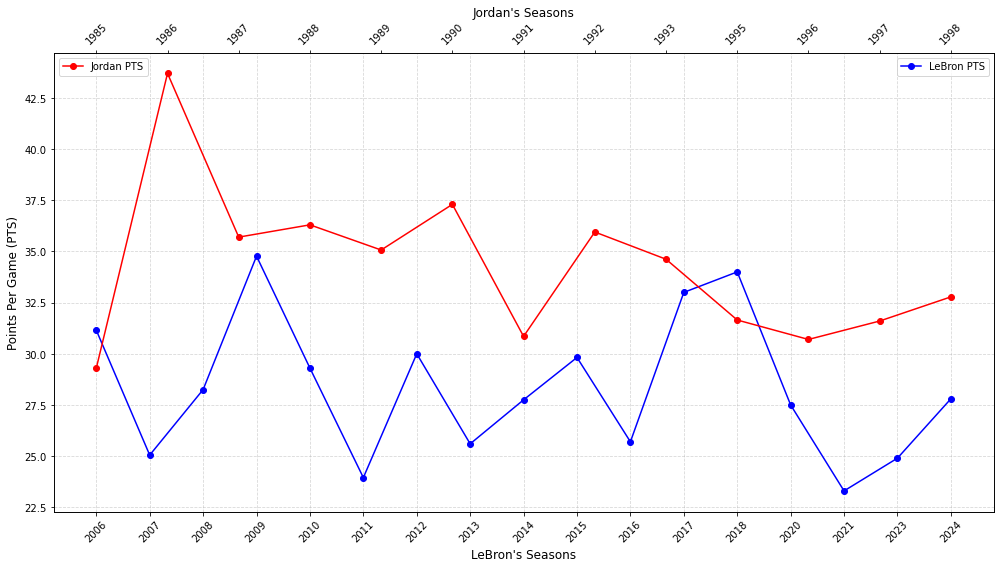

In [64]:
jordan_df = grouped_by_year_playoff_stats.loc[:12]
lebron_df = grouped_by_year_playoff_stats.loc[12+1:]

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(lebron_df['Year'], lebron_df['Player PTS'], marker='o', color='blue', label="LeBron PTS")
ax1.set_xlabel("LeBron's Seasons", fontsize=12)
ax1.set_ylabel("Points Per Game (PTS)", fontsize=12)


ax1.set_xticks(lebron_df['Year'])
ax1.set_xticklabels(lebron_df['Year'], rotation=45)

ax2 = ax1.twiny()

ax2.plot(jordan_df['Year'], jordan_df['Player PTS'], marker='o', color='red', label="Jordan PTS")
ax2.set_xlabel("Jordan's Seasons", fontsize=12)

ax2.set_xticks(jordan_df['Year'])
ax2.set_xticklabels(jordan_df['Year'], rotation=45)

ax1.grid(True, linestyle='--', alpha=0.5)

ax1.legend(loc="upper right")
ax2.legend(loc="upper left")

plt.tight_layout()
plt.show()


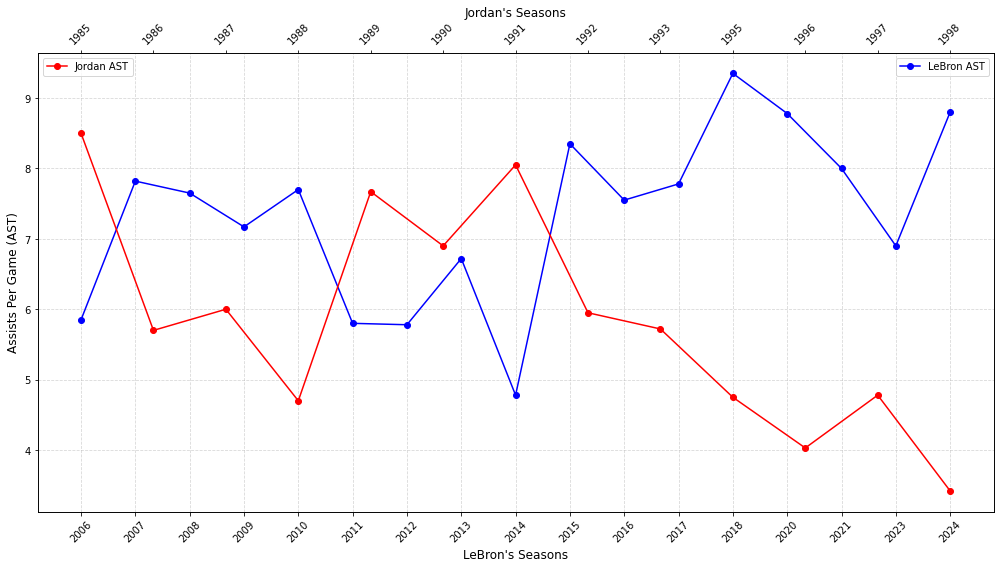

In [63]:

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(lebron_df['Year'], lebron_df['Player AST'], marker='o', color='blue', label="LeBron AST")
ax1.set_xlabel("LeBron's Seasons", fontsize=12)
ax1.set_ylabel("Assists Per Game (AST)", fontsize=12)

ax1.set_xticks(lebron_df['Year'])
ax1.set_xticklabels(lebron_df['Year'], rotation=45)

ax2 = ax1.twiny()

ax2.plot(jordan_df['Year'], jordan_df['Player AST'], marker='o', color='red', label="Jordan AST")
ax2.set_xlabel("Jordan's Seasons", fontsize=12)

ax2.set_xticks(jordan_df['Year'])
ax2.set_xticklabels(jordan_df['Year'], rotation=45)

ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")

plt.tight_layout()
plt.show()

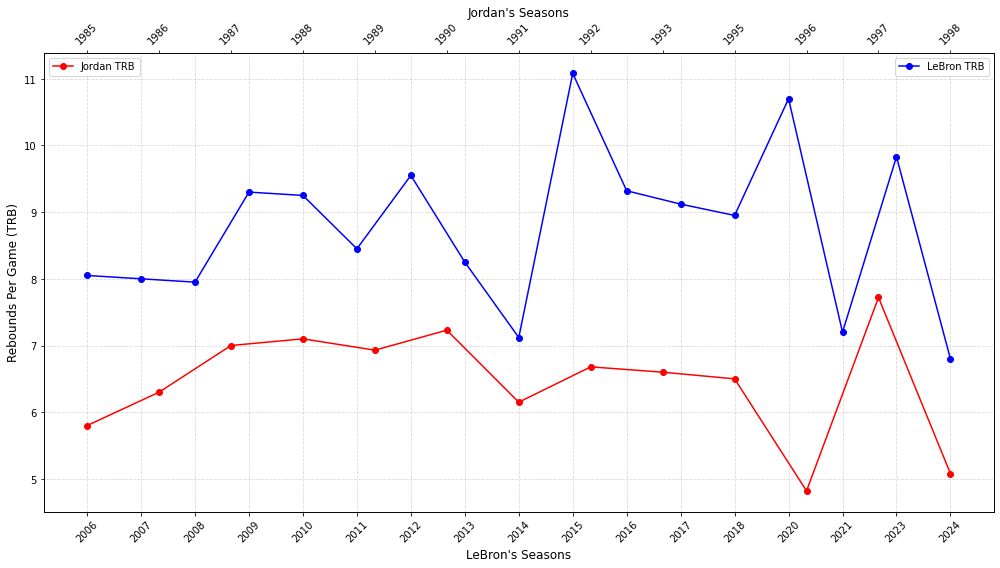

In [62]:
fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(lebron_df['Year'], lebron_df['Player TRB'], marker='o', color='blue', label="LeBron TRB")
ax1.set_xlabel("LeBron's Seasons", fontsize=12)
ax1.set_ylabel("Rebounds Per Game (TRB)", fontsize=12)

ax1.set_xticks(lebron_df['Year'])
ax1.set_xticklabels(lebron_df['Year'], rotation=45)

ax2 = ax1.twiny()

ax2.plot(jordan_df['Year'], jordan_df['Player TRB'], marker='o', color='red', label="Jordan TRB")
ax2.set_xlabel("Jordan's Seasons", fontsize=12)

ax2.set_xticks(jordan_df['Year'])
ax2.set_xticklabels(jordan_df['Year'], rotation=45)

ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")

plt.tight_layout()
plt.show()